In [131]:
# create our machine learning models

import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

print('pandas ', pd.__version__)
print('numpy ', np.__version__)
print('sklearn', sk.__version__)

pandas  1.1.3
numpy  1.19.2
sklearn 0.23.2


In [302]:
# load the data
train_data = pd.read_csv('data/train.csv')
train_data.shape

(2096, 23)

In [303]:
test_data = pd.read_csv('data/test.csv')
test_data.shape

(221, 23)

In [304]:
# separate true labels from attribute data
y_train = train_data['Attrition']
y_train = np.asarray(y_train)
X_train = train_data.drop(columns =['Attrition'])
X_train = np.asarray(X_train)

y_test = test_data['Attrition']
y_test = np.asarray(y_test)
X_test = test_data.drop(columns =['Attrition'])
X_test = np.asarray(X_test)

In [305]:
numerator = y_train[y_train == 1].sum()
denominator = len(y_train)
print("\n", numerator/denominator * 100, " percent of training data is in class 1")
print('len y_train: ', len(y_train))
print('len y_test: ', len(y_test))

numerator2 = y_test[y_test == 1].sum()
denominator2 = len(y_test)
print('\n', numerator2/denominator2 * 100, ' percent of test data is in class 1')


 50.0  percent of training data is in class 1
len y_train:  2096
len y_test:  221

 16.289592760180994  percent of test data is in class 1


In [306]:
def balanced_accuracy(y_test, y_pred):
    
    """
    function to calculate the balanced accuracy of a model
    params: true values and predicted values
    returns: (float) balanced accuracy score, (array) true positive count, true negative count, false positive count, false negative count
    """

    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(y_test)):
        if y_test[i]==1 and y_pred[i]== 1:
                tp +=1
        elif y_test[i]==0 and y_pred[i]== 0:
                tn +=1
        elif y_test[i]==0 and y_pred[i]== 1:
                fp +=1
        else:
            fn +=1
    
    return 0.5 * ((tp / (tp + fn)) + (tn / (tn + fp))),[tp,tn,fp,fn]

# KNN

In [405]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Train K-Nearest Neighbor model for binary classification
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_knn = knn_model.predict(X_test)
knn_test_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print('\nTest accuracy: '+str(knn_test_accuracy))

# Calculate the balanced accuracy and count of true positives, true negatives, false positives, false negatives
knn_balanced_accuracy, knn_eval_metrics = balanced_accuracy(y_test,y_pred_knn)
print("balanced accuracy: ", knn_balanced_accuracy)

# Calculate precision
knn_precision = metrics.precision_score(y_test, y_pred_knn, average='binary')
print("precision: ", knn_precision)

# Calculate recall
knn_recall = metrics.recall_score(y_test, y_pred_knn, average='binary')
print("recall: ", knn_recall)

# Calculate F1-Score
knn_f1 = metrics.f1_score(y_test, y_pred_knn)
print("F1 score: ", knn_f1)

# Calculate specificity
knn_specificity = knn_eval_metrics[1] / (knn_eval_metrics[1] + knn_eval_metrics[2])
print("specificity: ", knn_specificity)

# Add each metric to model evaluation dictionary
model_eval = {
    'knn': [knn_eval_metrics, knn_test_accuracy, knn_balanced_accuracy, knn_precision, knn_recall, knn_f1, knn_specificity]
}


Test accuracy: 0.7647058823529411
balanced accuracy:  0.714039039039039
precision:  0.3709677419354839
recall:  0.6388888888888888
F1 score:  0.4693877551020407
specificity:  0.7891891891891892


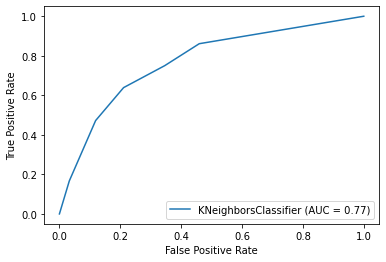

In [406]:
metrics.plot_roc_curve(knn_model, X_test, y_test)
plt.show()   

# Decision Tree

In [407]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Create instance of Decision Tree Classifier
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=0)
# Train decision tree model on training data
tree.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_tree = tree.predict(X_test)
tree_test_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
print("Test accuracy: "+str(tree_test_accuracy))

# Calculate the balanced accuracy and count of true positives, true negatives, false positives, false negatives
tree_balanced_accuracy, tree_eval_metrics=balanced_accuracy(y_test,y_pred_tree)
print("balanced accuracy:", tree_balanced_accuracy)

# Calculate precision
tree_precision = metrics.precision_score(y_test, y_pred_tree, average='binary')
print("precision: ", tree_precision)

# Calculate recall
tree_recall = metrics.recall_score(y_test, y_pred_tree, average='binary')
print("recall: ", tree_recall)

# Calculate F1-Score
tree_f1 = metrics.f1_score(y_test, y_pred_tree)
print("F1 score: ", tree_f1)

# Calculate specificity
tree_specificity = tree_eval_metrics[1] / (tree_eval_metrics[1] + tree_eval_metrics[2])
print("specificity: ", tree_specificity)

# Add each metric to model evaluation dictionary
model_eval['decision tree'] = [tree_eval_metrics, tree_test_accuracy, tree_balanced_accuracy, tree_precision, tree_recall, tree_f1, tree_specificity]

Test accuracy: 0.8235294117647058
balanced accuracy: 0.6932432432432433
precision:  0.46153846153846156
recall:  0.5
F1 score:  0.48000000000000004
specificity:  0.8864864864864865


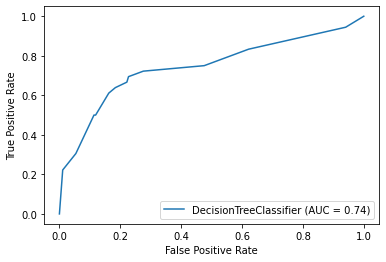

In [408]:
metrics.plot_roc_curve(tree, X_test, y_test)
plt.show()  

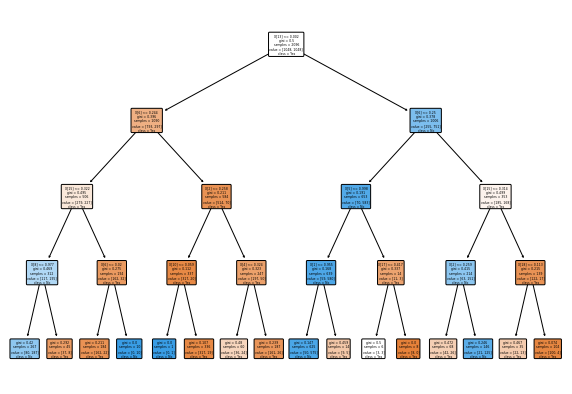

In [314]:
import matplotlib.pyplot as plt

# Plot decision tree model

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Yes', 
                       'No']) 

plt.show()

# SVM

In [409]:
from sklearn import svm

# Create Support Vector Machine model and train on training data
svm_model = svm.SVC(kernel='linear', decision_function_shape='ovo', probability=True)
svm_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_svm = svm_model.predict(X_test)
svm_test_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
print("Accuracy:",svm_test_accuracy)

# Calculate the balanced accuracy and count of true positives, true negatives, false positives, false negatives
svm_balanced_accuracy, svm_eval_metrics=balanced_accuracy(y_test,y_pred_svm)
print("balanced accuracy:", svm_balanced_accuracy)

# Calculate precision
svm_precision = metrics.precision_score(y_test, y_pred_svm, average='binary')
print("precision: ", svm_precision)

# Calculate recall
svm_recall = metrics.recall_score(y_test, y_pred_svm, average='binary')
print("recall: ", svm_recall)

# Calculate F1-Score
svm_f1 = metrics.f1_score(y_test, y_pred_svm)
print("F1 score: ", svm_f1)

# Calculate specificity
svm_specificity = svm_eval_metrics[1] / (svm_eval_metrics[1] + svm_eval_metrics[2])
print("specificity: ", svm_specificity)

# Add each metric to model evaluation dictionary
model_eval['svm'] = [svm_eval_metrics, svm_test_accuracy, svm_balanced_accuracy, svm_precision, svm_recall, svm_f1, svm_specificity]

Accuracy: 0.8190045248868778
balanced accuracy: 0.7576576576576577
precision:  0.46153846153846156
recall:  0.6666666666666666
F1 score:  0.5454545454545455
specificity:  0.8486486486486486


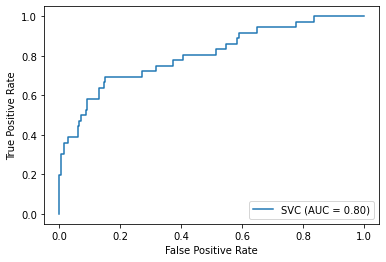

In [411]:
metrics.plot_roc_curve(svm_model, X_test, y_test)
plt.show()  

# Logistic Regression

In [412]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model and train on training data
lr_model = LogisticRegression(penalty='l2', random_state=0, solver='liblinear')
lr_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_lr = lr_model.predict(X_test)
lr_test_accuracy = metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy: ", lr_test_accuracy)

# Calculate the balanced accuracy and count of true positives, true negatives, false positives, false negatives
lr_balanced_accuracy, lr_eval_metrics=balanced_accuracy(y_test,y_pred_lr)
print("balanced accuracy:", lr_balanced_accuracy)

# Calculate precision
lr_precision = metrics.precision_score(y_test, y_pred_lr, average='binary')
print("precision: ", lr_precision)

# Calculate recall
lr_recall = metrics.recall_score(y_test, y_pred_lr, average='binary')
print("recall: ", lr_recall)

# Calculate F1-Score
lr_f1 = metrics.f1_score(y_test, y_pred_lr)
print("F1 score: ", lr_f1)

# Calculate specificity
lr_specificity = lr_eval_metrics[1] / (lr_eval_metrics[1] + lr_eval_metrics[2])
print("specificity: ", lr_specificity)

# Add each metric to model evaluation dictionary
model_eval['logistic regression'] = [lr_eval_metrics, lr_test_accuracy, lr_balanced_accuracy, lr_precision, lr_recall, lr_f1, lr_specificity]

Accuracy:  0.8190045248868778
balanced accuracy: 0.7576576576576577
precision:  0.46153846153846156
recall:  0.6666666666666666
F1 score:  0.5454545454545455
specificity:  0.8486486486486486


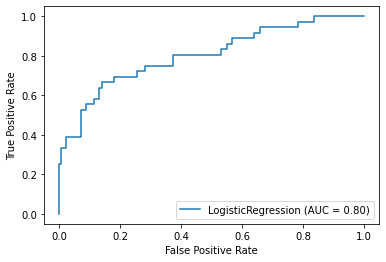

In [413]:
metrics.plot_roc_curve(lr_model, X_test, y_test)
plt.show()  

# Neural Network

In [414]:
from sklearn.neural_network import MLPClassifier

# Create multi-layer perceptron model and train on training data
mlp_model = MLPClassifier(hidden_layer_sizes=(150,100,50), activation='relu')
mlp_model.fit(X_test, y_test)

# Make predictions on test data and print the test accuracy
y_pred_mlp = mlp_model.predict(X_test)
mlp_test_accuracy = metrics.accuracy_score(y_test, y_pred_mlp)
print("Accuracy: ", mlp_test_accuracy)

# Calculate the balanced accuracy and count of true positives, true negatives, false positives, false negatives
mlp_balanced_accuracy, mlp_eval_metrics=balanced_accuracy(y_test,y_pred_mlp)
print("balanced accuracy:", mlp_balanced_accuracy)

# Calculate precision
mlp_precision = metrics.precision_score(y_test, y_pred_mlp, average='binary')
print("precision: ", mlp_precision)

# Calculate recall
mlp_recall = metrics.recall_score(y_test, y_pred_mlp, average='binary')
print("recall: ", mlp_recall)

# Calculate F1-Score
mlp_f1 = metrics.f1_score(y_test, y_pred_mlp)
print("F1 score: ", mlp_f1)

# Calculate specificity
mlp_specificity = mlp_eval_metrics[1] / (mlp_eval_metrics[1] + mlp_eval_metrics[2])
print("specificity: ", mlp_specificity)

# Add each metric to model evaluation dictionary
model_eval['neural network'] = [mlp_eval_metrics, mlp_test_accuracy, mlp_balanced_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_specificity]

Accuracy:  1.0
balanced accuracy: 1.0
precision:  1.0
recall:  1.0
F1 score:  1.0
specificity:  1.0


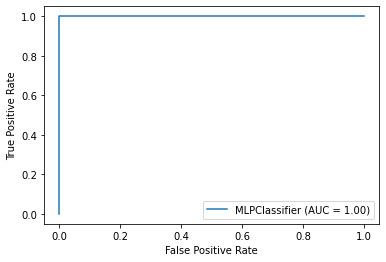

In [415]:
metrics.plot_roc_curve(mlp_model, X_test, y_test)
plt.show()  

# Random Forest Classifier

In [416]:
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier model and train on training data
rfc_model = RandomForestClassifier(criterion='entropy', random_state=0, max_features='log2', class_weight='balanced_subsample')
rfc_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_rfc = rfc_model.predict(X_test)
rfc_test_accuracy = metrics.accuracy_score(y_test, y_pred_rfc)
print("Accuracy: ", rfc_test_accuracy)

# Calculate the balanced accuracy and count of true positives, true negatives, false positives, false negatives
rfc_balanced_accuracy, rfc_eval_metrics=balanced_accuracy(y_test,y_pred_rfc)
print("balanced accuracy:", rfc_balanced_accuracy)

# Calculate precision
rfc_precision = metrics.precision_score(y_test, y_pred_rfc, average='binary')
print("precision: ", rfc_precision)

# Calculate recall
rfc_recall = metrics.recall_score(y_test, y_pred_rfc, average='binary')
print("recall: ", rfc_recall)

# Calculate F1-Score
rfc_f1 = metrics.f1_score(y_test, y_pred_rfc)
print("F1 score: ", rfc_f1)

# Calculate specificity
rfc_specificity = rfc_eval_metrics[1] / (rfc_eval_metrics[1] + rfc_eval_metrics[2])
print("specificity: ", rfc_specificity)

# Add each metric to model evaluation dictionary
model_eval['random forest'] = [rfc_eval_metrics, rfc_test_accuracy, rfc_balanced_accuracy, rfc_precision, rfc_recall, rfc_f1, rfc_specificity]

Accuracy:  0.8506787330316742
balanced accuracy: 0.5975975975975976
precision:  0.6153846153846154
recall:  0.2222222222222222
F1 score:  0.326530612244898
specificity:  0.972972972972973


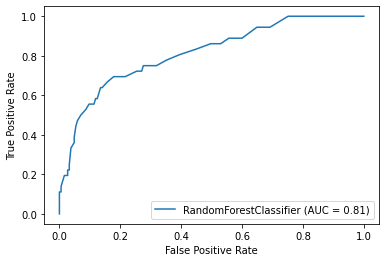

In [417]:
metrics.plot_roc_curve(rfc_model, X_test, y_test)
plt.show()  

# AdaBoost

In [418]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoost classifier model and train on training data
ada_model = AdaBoostClassifier(n_estimators=75, random_state=0)
ada_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_ada = ada_model.predict(X_test)
ada_test_accuracy = metrics.accuracy_score(y_test, y_pred_ada)
print("Accuracy: ", ada_test_accuracy)

# Calculate the balanced accuracy and count of true positives, true negatives, false positives, false negatives
ada_balanced_accuracy, ada_eval_metrics=balanced_accuracy(y_test,y_pred_ada)
print("balanced accuracy:", ada_balanced_accuracy)

# Calculate precision
ada_precision = metrics.precision_score(y_test, y_pred_ada, average='binary')
print("precision: ", ada_precision)

# Calculate recall
ada_recall = metrics.recall_score(y_test, y_pred_ada, average='binary')
print("recall: ", ada_recall)

# Calculate F1-Score
ada_f1 = metrics.f1_score(y_test, y_pred_ada)
print("F1 score: ", ada_f1)

# Calculate specificity
ada_specificity = ada_eval_metrics[1] / (ada_eval_metrics[1] + ada_eval_metrics[2])
print("specificity: ", ada_specificity)

# Add each metric to model evaluation dictionary
model_eval['adaboost'] = [ada_eval_metrics, ada_test_accuracy, ada_balanced_accuracy, ada_precision, ada_recall, ada_f1, ada_specificity]

Accuracy:  0.8868778280542986
balanced accuracy: 0.7758258258258259
precision:  0.6666666666666666
recall:  0.6111111111111112
F1 score:  0.6376811594202899
specificity:  0.9405405405405406


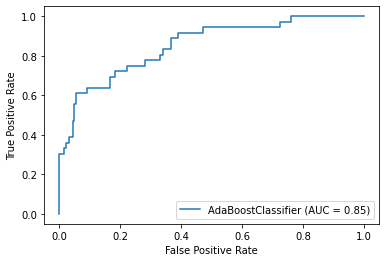

In [419]:
metrics.plot_roc_curve(ada_model, X_test, y_test)
plt.show()  

# Gradient Boosting

In [420]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier model and train on training data
gbc_model = GradientBoostingClassifier(random_state=0, n_estimators=75, max_features='auto')
gbc_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_gbc = gbc_model.predict(X_test)
gbc_test_accuracy = metrics.accuracy_score(y_test, y_pred_gbc)
print("Accuracy: ", gbc_test_accuracy)

# Calculate the balanced accuracy and count of true positives, true negatives, false positives, false negatives
gbc_balanced_accuracy, gbc_eval_metrics=balanced_accuracy(y_test,y_pred_gbc)
print("balanced accuracy:", gbc_balanced_accuracy)

# Calculate precision
gbc_precision = metrics.precision_score(y_test, y_pred_gbc, average='binary')
print("precision: ", gbc_precision)

# Calculate recall
gbc_recall = metrics.recall_score(y_test, y_pred_gbc, average='binary')
print("recall: ", gbc_recall)

# Calculate F1-Score
gbc_f1 = metrics.f1_score(y_test, y_pred_gbc)
print("F1 score: ", gbc_f1)

# Calculate specificity
gbc_specificity = gbc_eval_metrics[1] / (gbc_eval_metrics[1] + gbc_eval_metrics[2])
print("specificity: ", gbc_specificity)

# Add each metric to model evaluation dictionary
model_eval['gradient boost'] = [gbc_eval_metrics, gbc_test_accuracy, gbc_balanced_accuracy, gbc_precision, gbc_recall, gbc_f1, gbc_specificity]

Accuracy:  0.8959276018099548
balanced accuracy: 0.7476726726726727
precision:  0.76
recall:  0.5277777777777778
F1 score:  0.6229508196721312
specificity:  0.9675675675675676


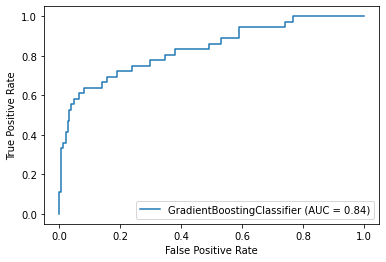

In [421]:
metrics.plot_roc_curve(gbc_model, X_test, y_test)
plt.show()  

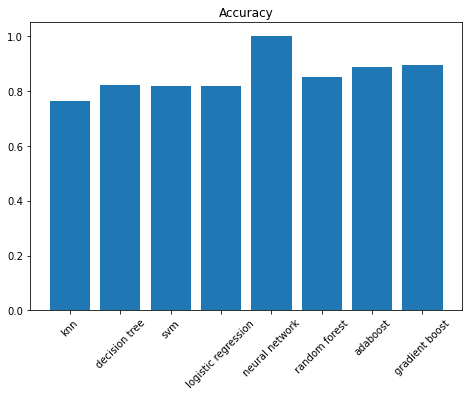

In [422]:
models = []
accs = []
balanced_accs = []
precisions = []
recalls = []
f1s = []
specificitys = []
for model, evaluation in model_eval.items():
    models.append(model)
    accs.append(evaluation[1])
    balanced_accs.append(evaluation[2])
    precisions.append(evaluation[3])
    recalls.append(evaluation[4])
    f1s.append(evaluation[5])
    specificitys.append(evaluation[6])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models, accs)
plt.title('Accuracy')
plt.xticks(rotation=45)
plt.show()

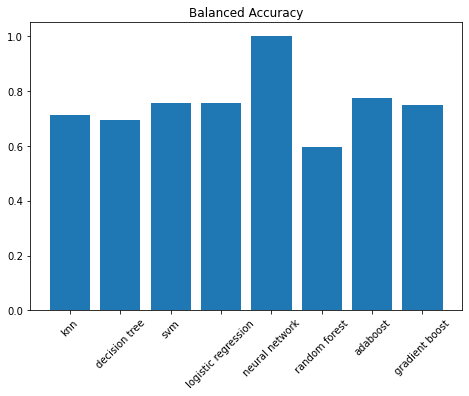

In [423]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(models, balanced_accs)
plt.title('Balanced Accuracy')
plt.xticks(rotation=45)
plt.show()

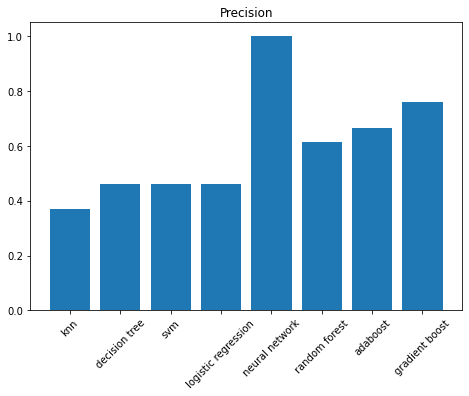

In [424]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
ax3.bar(models, precisions)
plt.title('Precision')
plt.xticks(rotation=45)
plt.show()

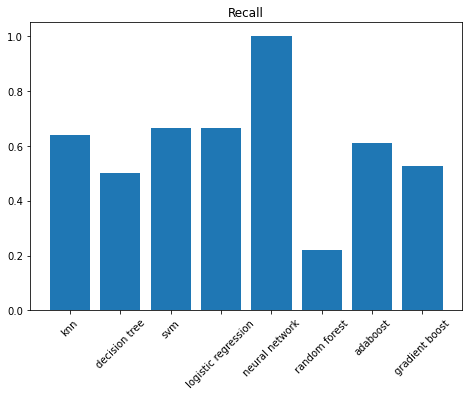

In [425]:
fig4 = plt.figure()
ax4 = fig4.add_axes([0,0,1,1])
ax4.bar(models, recalls)
plt.title('Recall')
plt.xticks(rotation=45)
plt.show()

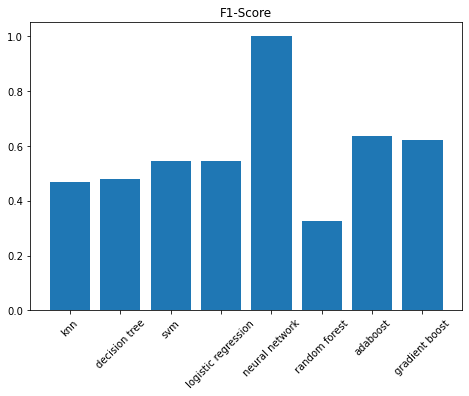

In [426]:
fig5 = plt.figure()
ax5 = fig5.add_axes([0,0,1,1])
ax5.bar(models, f1s)
plt.title('F1-Score')
plt.xticks(rotation=45)
plt.show()

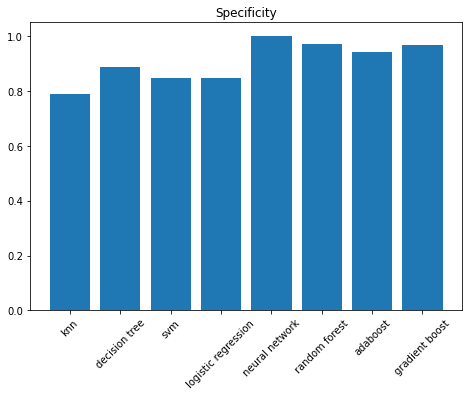

In [427]:
fig6 = plt.figure()
ax6 = fig6.add_axes([0,0,1,1])
ax6.bar(models, specificitys)
plt.title('Specificity')
plt.xticks(rotation=45)
plt.show()

In [428]:

df= pd.DataFrame()
df["measure"] = ["tp", "tn", "fp", "fn", "test accuracy", "balanced accuracy", "precision", "recall", "f1", "specificity"]
for model, evaluation in model_eval.items():
    df[model] = [
        evaluation[0][0],
        evaluation[0][1],
        evaluation[0][2],
        evaluation[0][3],
        evaluation[1],
        evaluation[2],
        evaluation[3], 
        evaluation[4], 
        evaluation[5], 
        evaluation[6]
    ]


df.style



,measure,knn,decision tree,svm,logistic regression,neural network,random forest,adaboost,gradient boost
0,tp,23.000000,18.000000,24.000000,24.000000,36.000000,8.000000,22.000000,19.000000
1,tn,146.000000,164.000000,157.000000,157.000000,185.000000,180.000000,174.000000,179.000000
2,fp,39.000000,21.000000,28.000000,28.000000,0.000000,5.000000,11.000000,6.000000
3,fn,13.000000,18.000000,12.000000,12.000000,0.000000,28.000000,14.000000,17.000000
4,test accuracy,0.764706,0.823529,0.819005,0.819005,1.000000,0.850679,0.886878,0.895928
5,balanced accuracy,0.714039,0.693243,0.757658,0.757658,1.000000,0.597598,0.775826,0.747673
6,precision,0.370968,0.461538,0.461538,0.461538,1.000000,0.615385,0.666667,0.760000
7,recall,0.638889,0.500000,0.666667,0.666667,1.000000,0.222222,0.611111,0.527778
8,f1,0.469388,0.480000,0.545455,0.545455,1.000000,0.326531,0.637681,0.622951
9,specificity,0.789189,0.886486,0.848649,0.848649,1.000000,0.972973,0.940541,0.967568
